# Homework 3

# Problem1 [10 points]

There are 2 for loop exercises, each worth 5 points each. You just have to get the desired output from for loops.

## (a) [5 points]

Create a function that counts the number of common divisors of two numbers. Start with:
```Python
def divisor(number1, number2):
```
and use for loop inside this function

In [31]:
def divisor(number1, number2):
    total = 0
    for i in range(1, number1+1):
        if number1 % i == 0 and number2 % i == 0:
            total += 1
    print("The number of common divisors of {} and {} is {}".format(number1, number2, total))

In [32]:
# Check:
divisor(2,3)
divisor(2,4)
divisor(6,12)

The number of common divisors of 2 and 3 is 1
The number of common divisors of 2 and 4 is 2
The number of common divisors of 6 and 12 is 4


## (b) [5 points]

Create a function that examines whether the given number is a prime number or not. Start with:
```Python
def prime(number):
```
and use for loop inside this function.

In [54]:
def prime(number):
    divisor = 0
    for i in range(2, number):
        if number % i == 0:
            divisor += 1
    if divisor == 0:
        print(number, "is a prime number")
    else:
        print(number, "is not a prime number")

In [57]:
# Check
prime(12)
prime(3)
prime(17)
prime(22)

12 is not a prime number
3 is a prime number
17 is a prime number
22 is not a prime number


# Problem 2 [10 points]

Grading scheme:
- 3 points: Get the correct dataset
- 3 points: Created a pie chart
- 3 points: Correct labels
- 1 point: Deal with NaNs

During classes, we classified the BMI of different people. Create a pie chart that shows the distribution of people in different stages of obesity.

### Hint:

The "NHANES.csv" file is located in "Data" file, so you can just use
```Python
pd.read_csv("Data/NHANES.csv")
```
to access it. BMI is in the "BMI" column.

In [18]:
import pandas as pd
df = pd.read_csv("Data/NHANES.csv")
df_new = df.dropna(subset=['BMI'])

def function(row):
    if row['BMI'] >= 40:
        return 'Severe Obesity'
    elif row['BMI'] >= 30:
        return 'Obesity'
    elif row['BMI'] >= 25:
        return 'Overweight'
    elif row['BMI'] >= 18.5:
        return 'Normal'
    elif row['BMI'] < 18.5:
        return 'Underweight'
    else:
        return 'NaN'
    
df_new['Obesity'] = df_new.apply(function, axis=1)

table = pd.crosstab(index=df_new["Obesity"], columns="count") 

C:\Users\daiki\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df_new['Obesity'].value_counts()

Normal            2941
Overweight        2656
Obesity           2281
Underweight       1271
Severe Obesity     485
Name: Obesity, dtype: int64

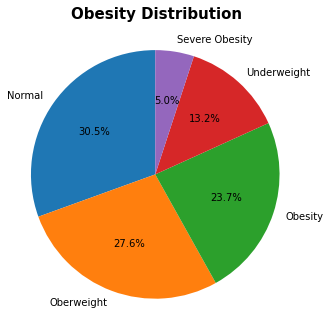

In [21]:
y_values = [2941, 2656, 2281, 1271, 485]
x_values = ['Normal','Oberweight', 'Obesity','Underweight','Severe Obesity']

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
axs.pie(y_values, labels=x_values, autopct='%1.1f%%', startangle=90)

axs.axis('equal')
plt.title('Obesity Distribution',fontweight="bold", fontsize=15, pad=20)
plt.show()

## Alternative Solution:

In [4]:
table = table.reindex(['Underweight','Normal','Overweight','Obesity','Severe Obesity'])

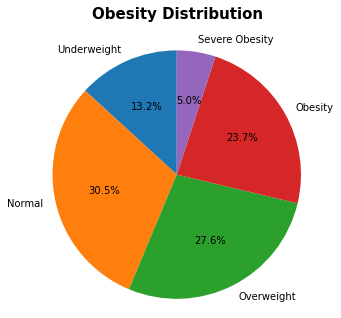

In [5]:
y_values = table["count"]
x_values = table.index

import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(5, 5)) # change figure size here
axs.pie(y_values, labels=x_values, autopct='%1.1f%%', startangle=90)

axs.axis('equal')
plt.title('Obesity Distribution',fontweight="bold", fontsize=15, pad=20)
plt.show()

# Problem 3 [15 points]

Grading scheme:
- 4 points: Create a visual to show education level of the U.S. 
- 1 point: Correctly dealt with NaNs
- 4 points: Create a two way frequency table
- 4 points: Determine the probability of each elements
- 2 points: Comment on the result

Race variable is located in 'Race3' column in NHANES.csv, and education level is available in 'Education' column in NHANES.csv. Create a visual to show the education level in the U.S. Afterwards, create a two way frequency table of education vs race. Determine the probability of each elements (i.e. show percentage of college grad, some college, etc for all race), and then comment on the result.

In [6]:
df_new = df.dropna(subset=['Education'])
table = pd.crosstab(index=df_new["Education"], columns="count") 
table

col_0,count
Education,
8th Grade,451
9 - 11th Grade,888
College Grad,2098
High School,1517
Some College,2267


In [7]:
table = table.reindex(['8th Grade','9 - 11th Grade','High School','Some College','College Grad'])

In [8]:
table

col_0,count
Education,
8th Grade,451
9 - 11th Grade,888
High School,1517
Some College,2267
College Grad,2098


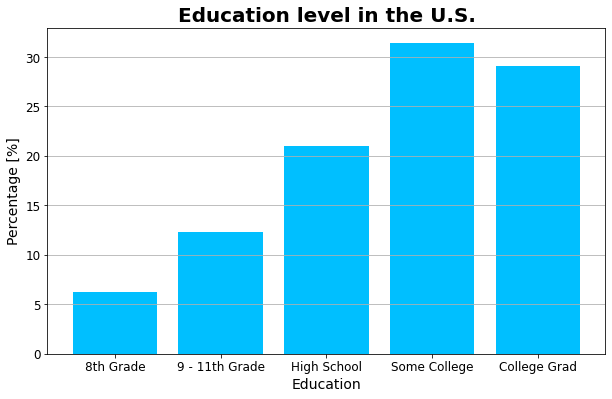

In [12]:
x_values = table.index
y_values = table['count'] / sum(table['count']) * 100

fig, axs = plt.subplots(figsize=(10,6)) # Change the figure size here       
axs.bar(x_values, y_values, color=('deepskyblue')) # You specify the color here     
axs.set_title("Education level in the U.S.", fontsize=20, fontweight="bold")   
axs.set_xlabel("Education", fontsize=14)
axs.set_ylabel("Percentage [%]", fontsize=14)
axs.tick_params(labelsize=12)  
plt.grid(axis='y')
plt.show() 

In [47]:
table = pd.crosstab(index=df_new["Education"], columns=df["Race3"]) 

In [49]:
table = table.reindex(['8th Grade','9 - 11th Grade','High School','Some College','College Grad'])
table['Asian_per'] = table['Asian'] / sum(table['Asian'])
table['Black_per'] = table['Black'] / sum(table['Black'])
table['Hispanic_per'] = table['Hispanic'] / sum(table['Hispanic'])
table['Mexican_per'] = table['Mexican'] / sum(table['Mexican'])
table['Other_per'] = table['Other'] / sum(table['Other'])
table['White_per'] = table['White'] / sum(table['White'])

In [50]:
table

Race3,Asian,Black,Hispanic,Mexican,Other,White,Asian_per,Black_per,Hispanic_per,Mexican_per,Other_per,White_per
Education,,,,,,,,,,,,
8th Grade,15,11,43,65,3,75,0.071770,0.027778,0.185345,0.239852,0.033708,0.031420
9 - 11th Grade,13,63,45,68,9,207,0.062201,0.159091,0.193966,0.250923,0.101124,0.086720
High School,15,94,57,61,16,436,0.071770,0.237374,0.245690,0.225092,0.179775,0.182656
Some College,56,152,53,54,46,799,0.267943,0.383838,0.228448,0.199262,0.516854,0.334730
College Grad,110,76,34,23,15,870,0.526316,0.191919,0.146552,0.084871,0.168539,0.364474


### Comment:

It can be anything that is based on this data. For example:

- Racial inequality in education
- Why it is important to observe proportions compared to raw counts
- etc

In reporting the results, it might be useful to report some extreme values in the data to show how the data is distributed.